In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [3]:
# Load built-in dataset
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', names=["label", "message"])

# Show first 5 rows
df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Text(0.5, 1.0, 'Ham vs Spam Distribution')

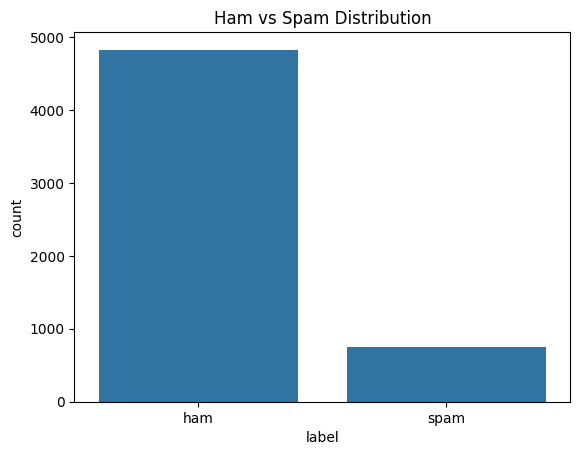

In [4]:
# Check for null values
df.isnull().sum()

# Plot class distribution
sns.countplot(data=df, x='label')
plt.title("Ham vs Spam Distribution")


In [5]:
# Convert labels to binary: ham = 0, spam = 1
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

# Split the dataset
X = df['message']
y = df['label_num']

# Vectorize the text
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.3, random_state=42)


In [6]:
# Initialize and train the model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)


Accuracy: 0.9850478468899522

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1448
           1       0.93      0.96      0.95       224

    accuracy                           0.99      1672
   macro avg       0.96      0.97      0.97      1672
weighted avg       0.99      0.99      0.99      1672



Text(0.5, 1.0, 'Confusion Matrix')

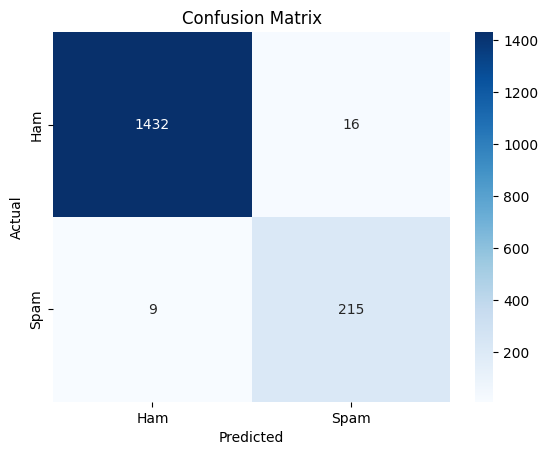

In [7]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")


In [8]:
def predict_message(msg):
    msg_vector = vectorizer.transform([msg])
    prediction = model.predict(msg_vector)
    return "Spam" if prediction[0] == 1 else "Ham"

# Example
print(predict_message("Congratulations! You have won a free ticket."))


Spam


In [9]:
import joblib

# Save model and vectorizer
joblib.dump(model, "spam_classifier_model.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")


['vectorizer.pkl']